In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import time

## Synthetic Data

In [2]:
centers= [[1,1], [-1,-1], [1,-1]]
X, y = make_blobs(n_samples = 10000, centers = centers, cluster_std = 0.6, random_state=42)

In [3]:
X.shape, np.unique(y)

((10000, 2), array([0, 1, 2]))

### Ideal clustering as per the dataset

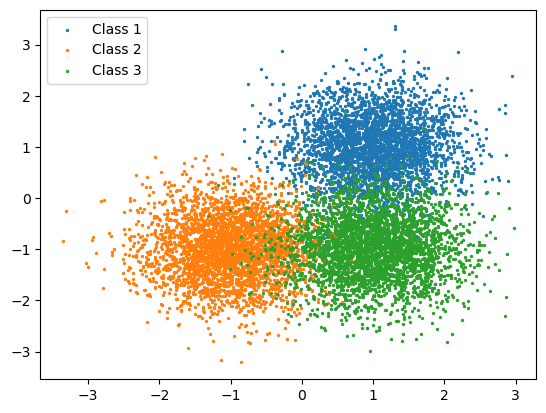

In [4]:
plt.scatter(X[y==0,0], X[y==0, 1], s=2)
plt.scatter(X[y==1,0], X[y==1, 1], s=2)
plt.scatter(X[y==2,0], X[y==2, 1], s=2)

plt.legend(["Class 1", "Class 2", "Class 3"])

## K means

In [5]:
k = 3 # Tunable parameter
np.random.seed(2)
random_centroids = np.array([X[np.random.randint(10000)] for i in range(k) ])

In [6]:
random_centroids

array([[ 1.05119089,  0.51504057],
       [ 0.41700596,  0.1722291 ],
       [ 1.71255509, -1.08980857]])

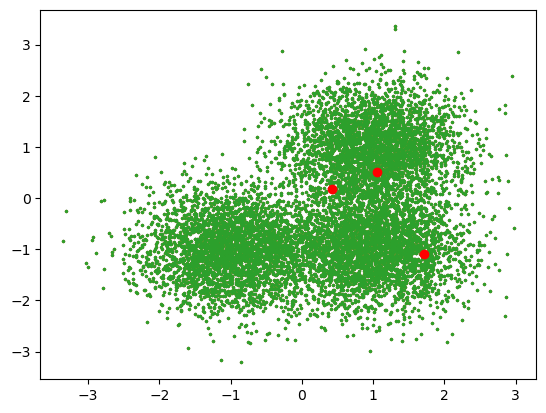

In [7]:
plt.scatter(X[:,0], X[:, 1], s=2)
plt.scatter(X[:,0], X[:, 1], s=2)
plt.scatter(X[:,0], X[:, 1], s=2)
plt.plot(random_centroids[:,0],random_centroids[:,1] ,'o', c='red')

In [8]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2)) # Multiple points

In [9]:
def visualize(X, random_centroids):
    plt.scatter(X[:,0], X[:, 1], s=2)
    plt.scatter(X[:,0], X[:, 1], s=2)
    plt.scatter(X[:,0], X[:, 1], s=2)
    plt.plot(random_centroids[:,0],random_centroids[:,1] ,'o', c='red')
    plt.show()
    time.sleep(0.5)
    plt.clf()

In [10]:
def Kmeans(k, random_centroids, iterr):
    for i in range(iterr): # Stopping criteria
        visualize(X, random_centroids)
        cluster = [[] for i in range(k)] 
        for i in range(len(X)):
            D = np.zeros(k,)
            for j in range (k):
                D[j] = distance(random_centroids[j], X[i])
            cluster[np.argmin(D)].append(X[i])
        random_centroids = np.array([np.mean(i, axis=0) for i in cluster])

    return random_centroids, cluster

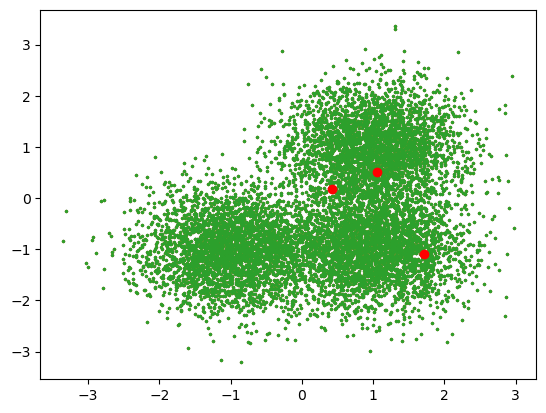

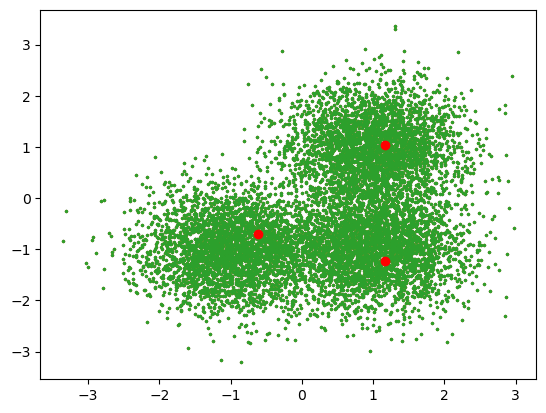

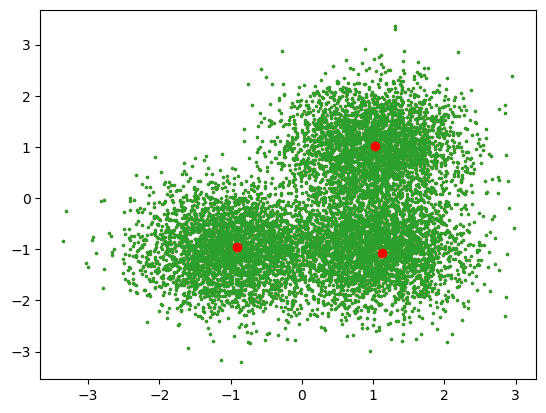

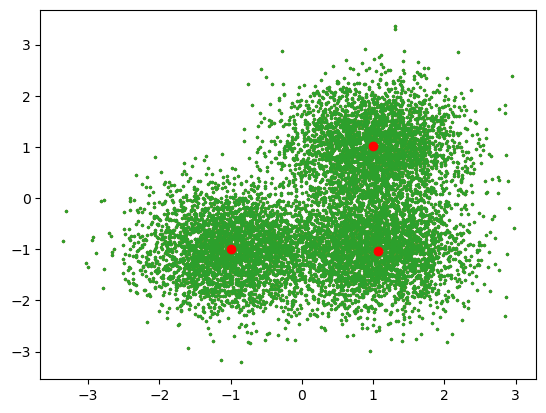

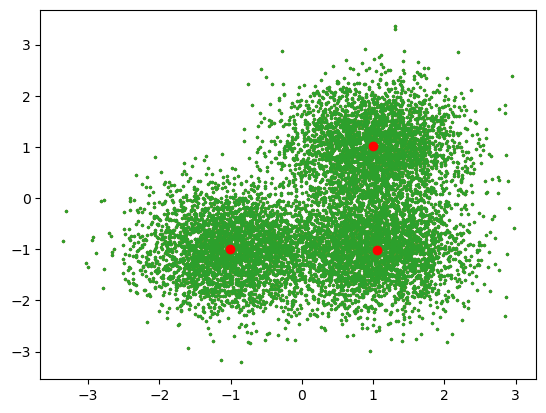

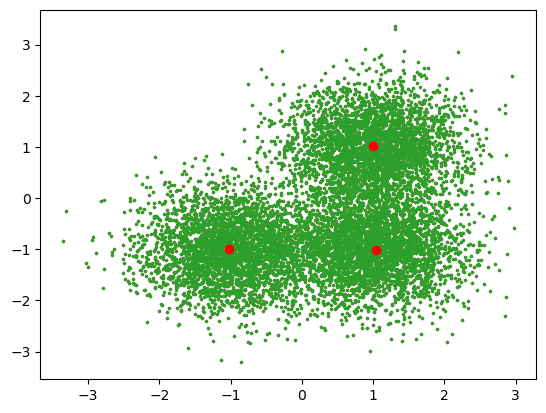

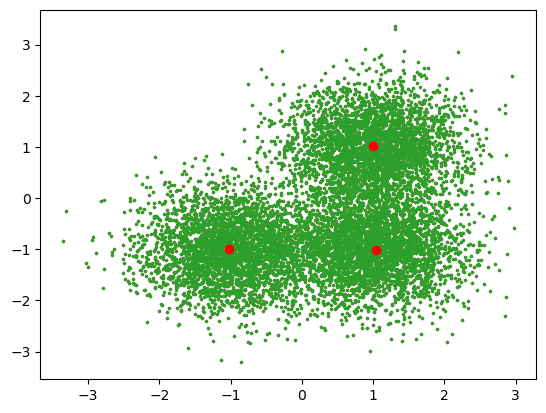

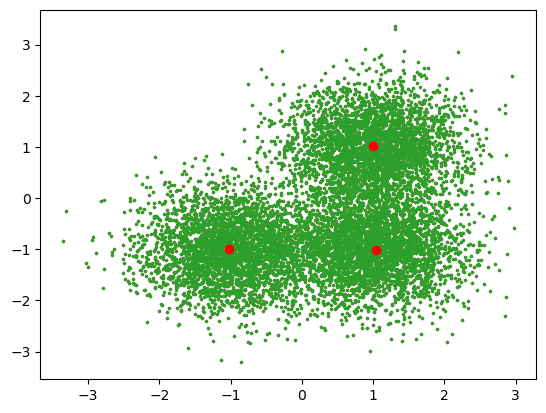

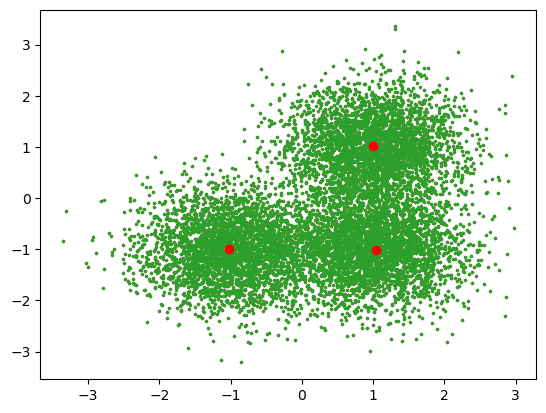

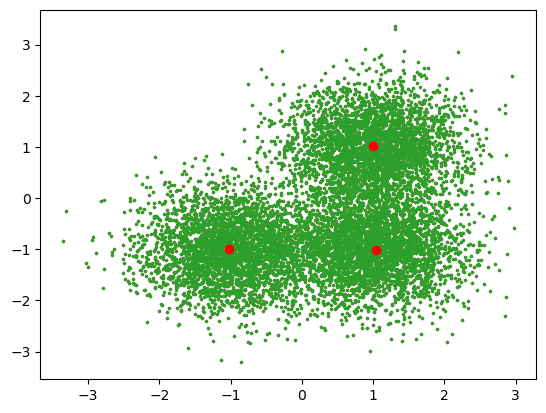

<Figure size 640x480 with 0 Axes>

In [11]:
random_centroids, cluster = Kmeans(3, random_centroids,10)

In [12]:
class1 = np.array(cluster[0])
class2 = np.array(cluster[1])
class3 = np.array(cluster[2])

In [13]:
X.shape

(10000, 2)

In [14]:
class1.shape

(3356, 2)

In [15]:
index1 = []
for i in range(len(class1)):
    index1.append(np.where(X==class1[i])[0][0])
index2 = []
for i in range(len(class2)):
    index2.append(np.where(X==class2[i])[0][0])
index3 = []
for i in range(len(class3)):
    index3.append(np.where(X==class3[i])[0][0])

## Visualisation of K-means' clustering

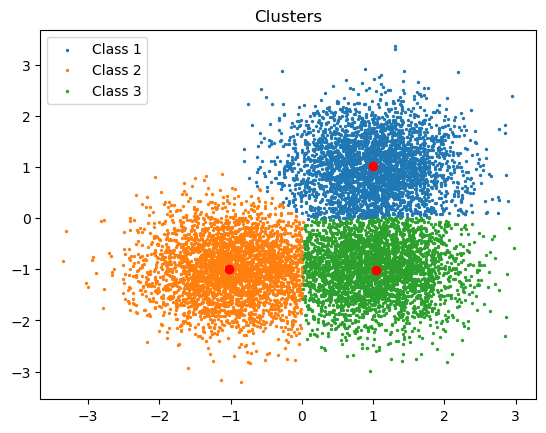

In [16]:
plt.scatter(X[index1,0], X[index1, 1], s=2)
plt.scatter(X[index2,0], X[index2, 1], s=2)
plt.scatter(X[index3,0], X[index3, 1], s=2)
plt.plot(random_centroids[:,0],random_centroids[:,1] ,'o', c='red')

plt.title("Clusters")
plt.legend(["Class 1", "Class 2", "Class 3"])